In [1]:
import numpy as np

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

matplotlib.rcParams.update({'font.size': 8, 'axes.linewidth': 0.5, 'xtick.major.width': 0.5, 'xtick.minor.width': 0.5, 
                            'ytick.major.width': 0.5,'ytick.minor.width': 0.5, 'xtick.major.pad':2,'ytick.major.pad':2})
matplotlib.rcParams.update({'font.family':'sans-serif','font.sans-serif':['Arial'], 'mathtext.default':'sf','mathtext.fontset':'custom'})

matplotlib.rcParams.update({'savefig.transparent':True})

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os

In [3]:
blue = (58/255, 177/255, 229/255)
lightblue = (195/255, 230/255, 242/255)

green = (29/255, 111/255, 65/255)
lightgreen = (202/255, 231/255, 215/255)

# Results of learning with tuned/untuned rules

In [4]:
## Generate stimulus
# Total time
T = 0.5 # s
# Time step size
dt = 2e-3 # s

t = np.arange(0, int(T/dt))*dt

# Optokinetic stimulus
peak_stim = 10
stim = peak_stim*np.sin(2*np.pi*t)

In [60]:
N_sims = 10
N_iterations = 7200
pc_eye_sensitivity = 1

In [63]:
pc_average_untuned = np.zeros((N_sims, len(t)))
sses_untuned = np.zeros((N_sims, N_iterations))

for i in range(N_sims):
    pc_average_untuned_temp = np.load('results/untuned/%d_pc_untuned.npy'%i)
    pc_average_untuned[i,:] = pc_average_untuned_temp[-3601,:]
    
    sses_untuned[i,:] = np.load('results/untuned/%d_sse_untuned.npy'%i)

In [64]:
pc_average_tuned = np.zeros((N_sims, len(t)))
sses_tuned = np.zeros((N_sims, N_iterations))

for i in range(N_sims):
    pc_average_tuned_temp = np.load('results/tuned/%d_pc_tuned.npy'%i)
    pc_average_tuned[i,:] = pc_average_tuned_temp[-3601,:]
    
    sses_tuned[i,:] = np.load('results/tuned/%d_sse_tuned.npy'%i)

In [56]:
mu_untuned = np.mean(pc_eye_sensitivity*pc_average_untuned, axis=0)
sigma_untuned = np.std(pc_eye_sensitivity*pc_average_untuned, axis=0)

mu_tuned = np.mean(pc_eye_sensitivity*pc_average_tuned, axis=0)
sigma_tuned = np.std(pc_eye_sensitivity*pc_average_tuned, axis=0)

## Average learned component (Fig. 2d)

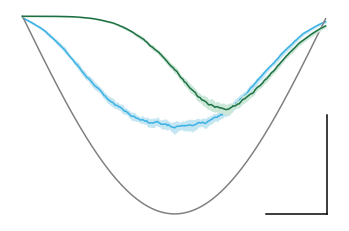

In [47]:
plt.plot(t, mu_tuned, c=blue)
plt.fill_between(t,mu_tuned-sigma_tuned, mu_tuned+sigma_tuned, color=lightblue)

plt.plot(t, mu_untuned, c=green, zorder=100)
plt.fill_between(t,mu_untuned-sigma_untuned, mu_untuned+sigma_untuned, color=lightgreen, zorder=90)

plt.plot([0.4, 0.5], [-10, -10], c='k')
plt.plot([0.5, 0.5], [-5, -10], c='k')

plt.plot(t, -stim, c=(0.5, 0.5, 0.5, 1))
plt.axis('off');


## Average eye movements (Fig. 2c)

In [48]:
baseline_gain_tuned = 0.35
baseline_gain_untuned = 0.41

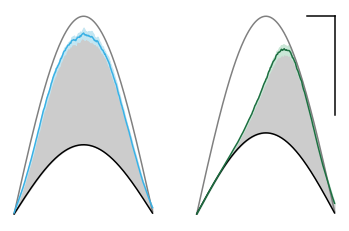

In [49]:

plt.subplot(1,2,1)
plt.plot(t, stim, c=(0.5, 0.5, 0.5, 1))
plt.plot(t, baseline_gain_tuned*stim, c='k')
plt.plot(t, baseline_gain_tuned*stim -mu_tuned, c=blue)
plt.fill_between(t,baseline_gain_tuned*stim - (mu_tuned-sigma_tuned), baseline_gain_tuned*stim - (mu_tuned+sigma_tuned), color=lightblue)
plt.fill_between(t, baseline_gain_tuned*stim, baseline_gain_tuned*stim - mu_tuned, color=(0.8, 0.8, 0.8, 1), zorder=0)
plt.axis('off')

plt.subplot(1,2,2)
plt.plot(t, stim, c=(0.5, 0.5, 0.5, 1))
plt.plot(t, baseline_gain_untuned*stim, c='k')
plt.plot(t, baseline_gain_untuned*stim -mu_untuned, c=green)
plt.fill_between(t,baseline_gain_untuned*stim - (mu_untuned-sigma_untuned), baseline_gain_untuned*stim - (mu_untuned+sigma_untuned), color=lightgreen)
plt.fill_between(t, baseline_gain_untuned*stim, baseline_gain_untuned*stim - mu_untuned, color=(0.8, 0.8, 0.8, 1), zorder=0)

plt.plot([0.4, 0.5], [10, 10], c='k')
plt.plot([0.5, 0.5], [5, 10], c='k')

plt.axis('off');

## Example eye movement (Fig. 2c)

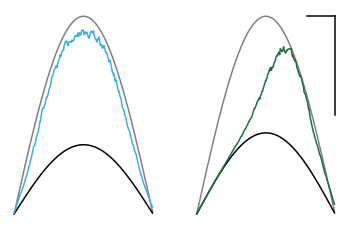

In [50]:
plt.subplot(1,2,1)
plt.plot(t, stim, c=(0.5, 0.5, 0.5, 1))
plt.plot(t, baseline_gain_tuned*stim, c='k')
plt.plot(t, baseline_gain_tuned*stim - pc_eye_sensitivity*pc_average_tuned[0,:], c=blue)
plt.axis('off')

plt.subplot(1,2,2)
plt.plot(t, stim, c=(0.5, 0.5, 0.5, 1))
plt.plot(t, baseline_gain_untuned*stim, c='k')
plt.plot(t, baseline_gain_untuned*stim - pc_eye_sensitivity*pc_average_untuned[0,:], c=green)

plt.plot([0.4, 0.5], [10, 10], c='k')
plt.plot([0.5, 0.5], [5, 10], c='k')

plt.axis('off');

## Timing of peak eye velocity in learned component (Fig. 2d)

In [57]:
peak_untuned = np.array([t[np.argmin(pc_average_untuned[i,:])] for i in range(N_sims)])
peak_tuned = np.array([t[np.argmin(pc_average_tuned[i,:])] for i in range(N_sims)])
peak_untuned -= 0.25 # Subtract time of peak stimulus, 250 ms
peak_tuned -= 0.25

In [58]:
peak_untuned_mu = np.mean(peak_untuned)
peak_untuned_std = np.std(peak_untuned)

peak_tuned_mu = np.mean(peak_tuned)
peak_tuned_std = np.std(peak_tuned)

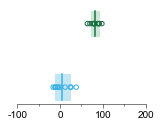

In [59]:
plt.figure(figsize=(2.3,1.8))

plt.scatter(peak_untuned, np.ones(N_sims), edgecolor=green, facecolor='none', zorder=10, marker='o', s=20)
plt.fill_between([peak_untuned_mu - peak_untuned_std, peak_untuned_mu+peak_untuned_std],
                 [0.9, 0.9], [1.1, 1.1], color=lightgreen)
plt.plot([peak_untuned_mu,]*2, [0.9, 1.1], c=green)

plt.scatter(peak_tuned, 0.5*np.ones(N_sims), edgecolor=blue, facecolor='none', zorder=10, marker='o', s=20)
plt.fill_between([peak_tuned_mu - peak_tuned_std, peak_tuned_mu+peak_tuned_std],
                 [0.4,]*2, [0.6,]*2, color=lightblue)
plt.plot([peak_tuned_mu,]*2, [0.4, 0.6], c=blue)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_visible(False)

plt.xlim([-0.1, 0.2])
ax.set_xticks([-0.1, 0, 0.1, 0.2]);
ax.set_xticklabels([-100, 0, 100, 200])
ax.set_xticks([-0.05, 0.05, 0.15],minor=True);

# Extended data figure 2 - asymptotic learning

In [65]:
rmse_untuned_mu = np.mean(np.sqrt(sses_untuned/len(t)), axis=0)
rmse_untuned_std = np.std(np.sqrt(sses_untuned/len(t)), axis=0)

rmse_tuned_mu = np.mean(np.sqrt(sses_tuned/len(t)), axis=0)
rmse_tuned_std = np.std(np.sqrt(sses_tuned/len(t)), axis=0)

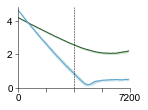

In [76]:
plt.figure(figsize=(2, 1.5))
x = np.arange(len(rmse_untuned_mu))
samps = 100

plt.plot(x[::samps], rmse_untuned_mu[::samps], c=(43/255, 90/255, 51/255), lw=1)
plt.fill_between(x[::samps], (rmse_untuned_mu-rmse_untuned_std)[::samps], (rmse_untuned_mu+rmse_untuned_std)[::samps], color=(206/255, 228/255, 204/255))

plt.plot(x[::samps], rmse_tuned_mu[::samps], c=(91/255, 162/255, 203/255), lw=1)
plt.fill_between(x[::samps], (rmse_tuned_mu-rmse_tuned_std)[::samps], (rmse_tuned_mu+rmse_tuned_std)[::samps], color=(205/255, 228/255, 236/255))



ylims = plt.ylim()
plt.plot([3600,]*2, [0, ylims[-1]], c='k', ls='--', lw=0.5)
plt.ylim([0, ylims[-1]])
plt.xlim([0, 7200])

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(np.linspace(0, 7200, 5), [0, '', '', '', 7200]);

## Retinal slip after 2 hrs of training

In [77]:
pc_untuned_extended = np.zeros((N_sims, len(t)))

for i in range(N_sims):
    pc_average_untuned_temp = np.load('results/untuned/%d_pc_untuned.npy'%i)
    pc_untuned_extended[i,:] = pc_average_untuned_temp[-1,:]

In [78]:
pc_tuned_extended = np.zeros((N_sims, len(t)))

for i in range(N_sims):
    pc_average_tuned_temp = np.load('results/tuned/%d_pc_tuned.npy'%i)
    pc_tuned_extended[i,:] = pc_average_tuned_temp[-1,:]

In [79]:
pc_untuned_extended_mu = np.mean(pc_untuned_extended, axis=0)
pc_untuned_extended_std = np.std(pc_untuned_extended, axis=0)

pc_tuned_extended_mu = np.mean(pc_tuned_extended, axis=0)
pc_tuned_extended_std = np.std(pc_tuned_extended, axis=0)

In [80]:
eye_movts_untuned = baseline_gain_untuned*np.array([stim,]*3) - (np.array([pc_untuned_extended_mu,]*3) + np.array([-pc_eye_sensitivity*pc_untuned_extended_std, np.zeros(len(t)), pc_eye_sensitivity*pc_untuned_extended_std]))
eye_movts_tuned = baseline_gain_tuned*np.array([stim,]*3) - (np.array([pc_tuned_extended_mu,]*3) + np.array([-pc_eye_sensitivity*pc_tuned_extended_std, np.zeros(len(t)), pc_eye_sensitivity*pc_tuned_extended_std]))

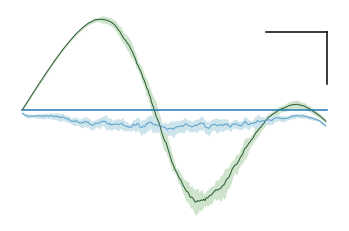

In [82]:
plt.plot(t, stim - eye_movts_untuned[1], c=(43/255, 90/255, 51/255), lw=1)
plt.fill_between(t, stim-eye_movts_untuned[0], stim-eye_movts_untuned[2], color=(206/255, 228/255, 204/255))

plt.plot(t, stim - eye_movts_tuned[1], c=(91/255, 162/255, 203/255), lw=1)
plt.fill_between(t, stim-eye_movts_tuned[0], stim-eye_movts_tuned[2], color=(205/255, 228/255, 236/255))

plt.plot([0.5, 0.5], [1, 3], c='k')
plt.plot([0.4, 0.5], [3, 3], c='k')

plt.plot([0, 0.5], [0, 0])
plt.axis('off');